# **Differentiation in PyTorch**

**Objective**



How to perform differentiation in pytorch.

**Preparation**

In [1]:
import torch
import matplotlib.pylab as plt


**Derivatives**


Let us create the tensor x and set the parameter requires_grad to true because you are going to take the derivative of the tensor.

In [2]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


Then let us create a tensor according to the equation  𝑦=𝑥2


In [3]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


Then let us take the derivative with respect x at x = 2

In [4]:
# Take the derivative. Try to print out the derivative at the value x = 2

y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation:

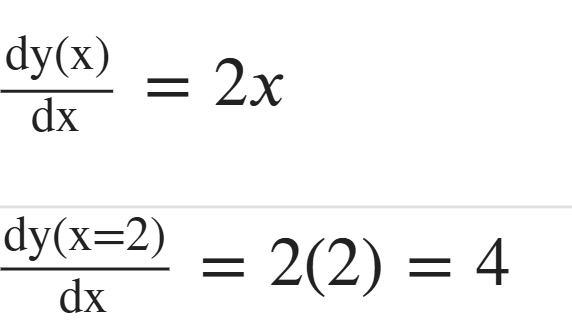

In [5]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [6]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7ac1f678db40>
grad: None
is_leaf: False
requires_grad: True


<ipython-input-6-3853135f74d0>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('grad:',y.grad)


Let us try to calculate the derivative for a more complicated function.

In [7]:
# Calculate the y = x^2 + 2x + 1, then find the derivative

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


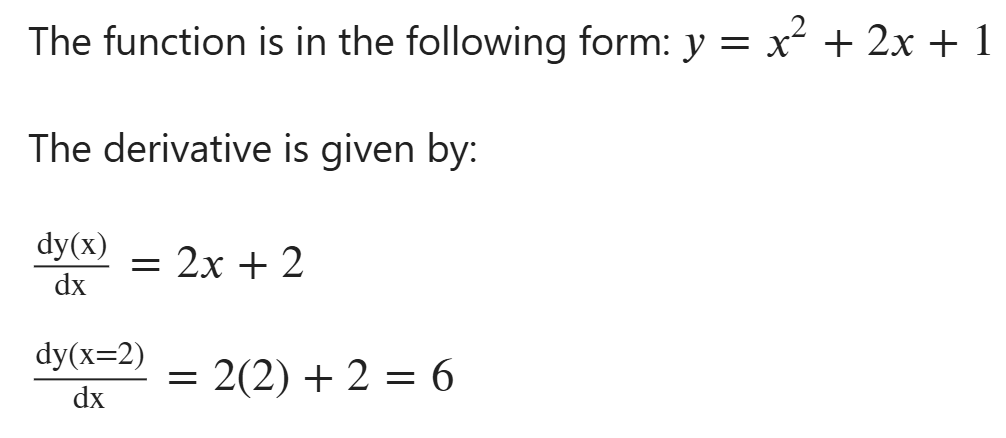

We can implement our own custom autograd Functions by subclassing torch.autograd.Function and implementing the forward and backward passes which operate on Tensors

In [8]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [9]:
# We can apply it the function
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

Partial Derivatives
We can also calculate Partial Derivatives. Consider the function:  𝑓(𝑢,𝑣)=𝑣𝑢+𝑢2





Let us create u tensor, v tensor and f tensor

In [10]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


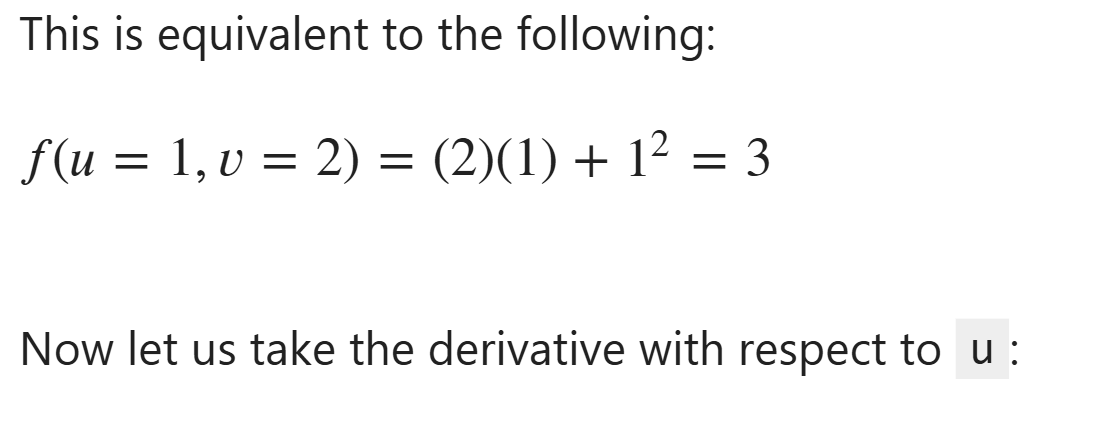

In [11]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


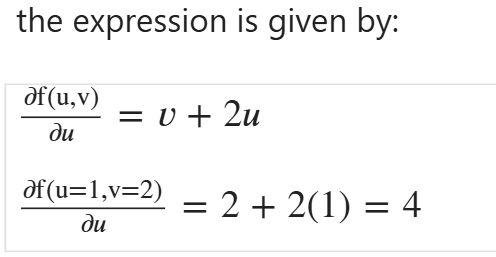








Now, take the derivative with respect to v:

In [12]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)



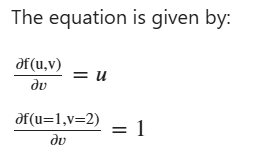

Calculate the derivative with respect to a function with multiple values as follows. You use the sum trick to produce a scalar valued function and then take the gradient:

In [13]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

We can plot the function and its derivative

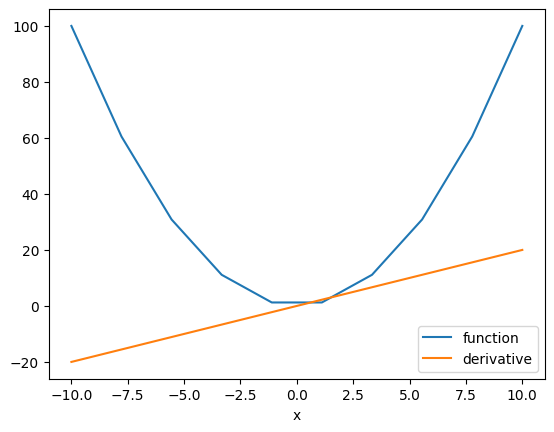

In [14]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

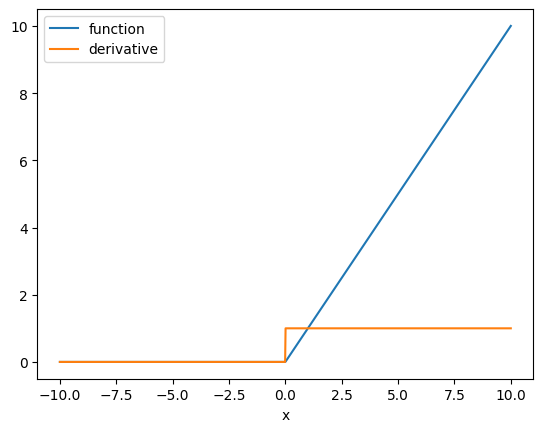

In [15]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [16]:
y.grad_fn